In [20]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import *; from sklearn.metrics import *
import math; import statsmodels.api as sm

In [6]:
df = pd.read_csv("C:\\Users\\ryans45attcd.ie\\Dropbox\\Programming\\CSGO Prediction\\PandasCombinersNewDB\\Version 5 (uses top20) y is roundwinpercent\\Generated\\final.csv")#
df.drop(["T%", "CT%","RoD","H2H","CO","Comp"], axis=1, inplace=True)

In [ ]:
#plt.hist(df['CO'], bins=10);

spearman 0.2777434696486196


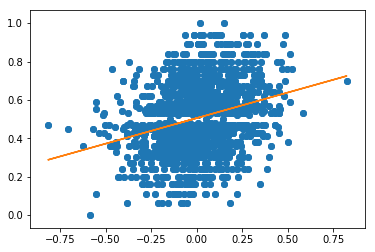

In [45]:
# correlation with W/L
feature = df['RaD']
slope, intercept, r_value, p_value, std_err = stats.linregress(feature, df['W/L'])
line = slope * feature + intercept
print('spearman',feature.corr(df['W/L'], method='spearman'))
plt.plot(feature,df['W/L'],'o', feature, line)
plt.scatter(feature, df['W/L'])

spearman 0.11915447400536341


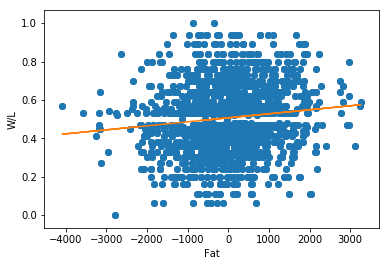

In [47]:
# correlate two features
feature1, feature2 = df['Fat'], df['W/L']
slope, intercept, r_value, p_value, std_err = stats.linregress(feature1, feature2)
print('spearman',feature1.corr(feature2, method='spearman'))
line = slope * feature1 + intercept
plt.plot(feature1,feature2,'o', feature1, line)
plt.scatter(feature1, feature2)
plt.xlabel(feature1.name)
plt.ylabel(feature2.name);

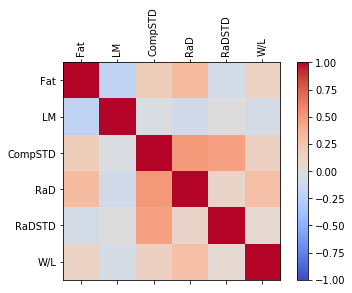

In [40]:
# correlation matrix
corr = df.corr(method='spearman')
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [46]:
# simple linear regression
x = df.drop("W/L",axis=1); y = df['W/L']
x = sm.add_constant(x)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.683120
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    W/L   No. Observations:                 1549
Model:                          Logit   Df Residuals:                     1543
Method:                           MLE   Df Model:                            5
Date:                Wed, 09 Oct 2019   Pseudo R-squ.:                 0.01367
Time:                        18:06:48   Log-Likelihood:                -1058.2
converged:                       True   LL-Null:                       -1072.8
Covariance Type:            nonrobust   LLR p-value:                 2.004e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.051      0.369      0.712      -0.082       0.119
Fat         2.408e-05   5.58e